<a href="https://colab.research.google.com/github/Archana-cpu/Archana-cpu.github.io/blob/main/Vetflix_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/users_stock_merge.csv")

In [ ]:
df.head()

,monthly_revenue,users_join_month,total_users,open_price,users_trade_month,high_price,low_price,close_price,Trade_volume
0,12.00,2008-03,6,97.83,2008-03,100.11,95.13,97.58,254607500
1,12.00,2021-07,98,11100.79,2021-07,11220.27,10974.98,11101.72,77221200
2,12.50,2009-04,44,136.80,2009-04,140.23,133.96,137.52,321716500
3,11.75,2009-08,48,134.05,2009-08,135.60,132.05,133.84,152079200
4,11.75,2015-05,91,1701.15,2015-05,1716.86,1687.12,1704.00,280030800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   monthly_revenue    164 non-null    float64
 1   users_join_month   164 non-null    object 
 2   total_users        164 non-null    int64  
 3   open_price         164 non-null    float64
 4   users_trade_month  164 non-null    object 
 5   high_price         164 non-null    float64
 6   low_price          164 non-null    float64
 7   close_price        164 non-null    float64
 8   Trade_volume       164 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 11.7+ KB


In [ ]:
df['users_trade_month'] = pd.to_datetime(df['users_trade_month'], format='%Y-%m')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   monthly_revenue    164 non-null    float64       
 1   users_join_month   164 non-null    object        
 2   total_users        164 non-null    int64         
 3   open_price         164 non-null    float64       
 4   users_trade_month  164 non-null    datetime64[ns]
 5   high_price         164 non-null    float64       
 6   low_price          164 non-null    float64       
 7   close_price        164 non-null    float64       
 8   Trade_volume       164 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 11.7+ KB


In [ ]:
!pip install darts --quiet

import darts
print(f"Darts version: {darts.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.3/917.3 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.7/196.7 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 36.7 MB/s eta 0:

<Axes: xlabel='users_trade_month'>

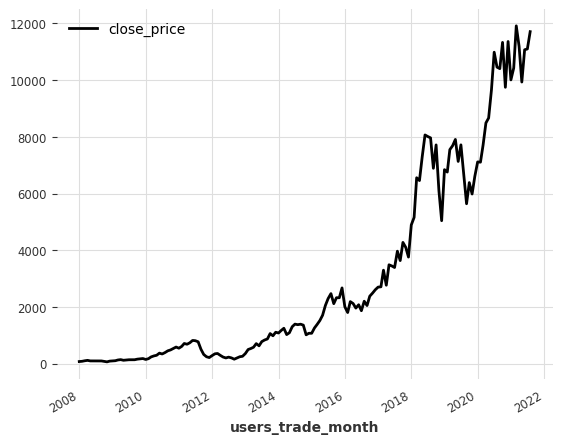

In [ ]:
from darts import TimeSeries
series = TimeSeries.from_dataframe(df, 'users_trade_month', 'close_price')
series.plot()

In [ ]:
resampled_example = series.resample("Y")

<Axes: xlabel='users_trade_month'>

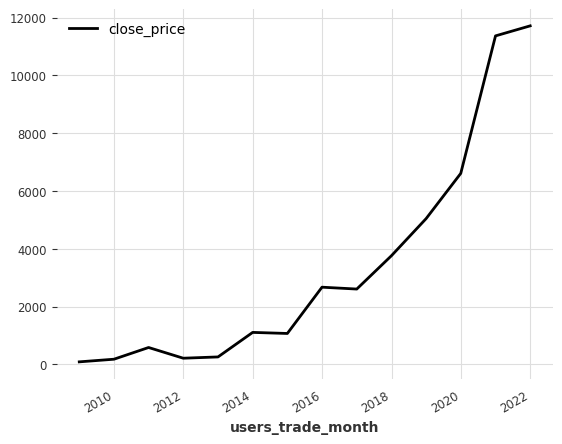

In [ ]:
resampled_example.plot()

In [ ]:
import numpy as np
logged = (series).map(lambda x: np.log(x))

In [ ]:
from darts.dataprocessing.transformers.scaler import Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [ ]:
ts_transformer = Scaler(scaler)

In [ ]:
scaled_ts = ts_transformer.fit_transform(logged)

<Axes: xlabel='users_trade_month'>

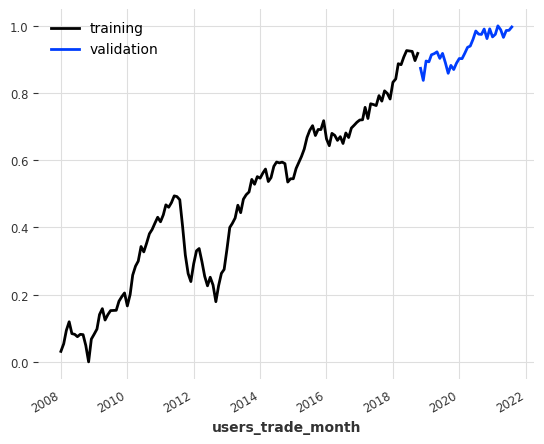

In [ ]:
train, val = (scaled_ts).split_before(0.8)# (we standardize by dividing by 100 since Google Trends data tops out at 100 by default!)
train.plot(label="training")
val.plot(label="validation")

<Axes: xlabel='users_trade_month'>

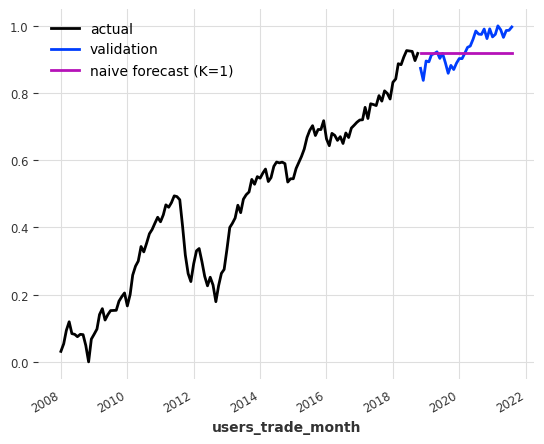

In [ ]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=1)
naive_model.fit(train)
naive_forecast = naive_model.predict(len(val))

train.plot(label="actual")
val.plot(label = "validation")
naive_forecast.plot(label="naive forecast (K=1)")

In [ ]:
from darts.metrics import mape

accuracy = mape(val, naive_forecast)
print(f"Mean Absolute Percentage Error: {accuracy}")

Mean Absolute Percentage Error: 4.360424546211913


In [ ]:
from darts.models import ExponentialSmoothing

# Initialize and fit an Exponential Smoothing model
model = ExponentialSmoothing()
model.fit(train)

# Generate forecasts
exp_forecast = model.predict(len(val))


<Axes: xlabel='users_trade_month'>

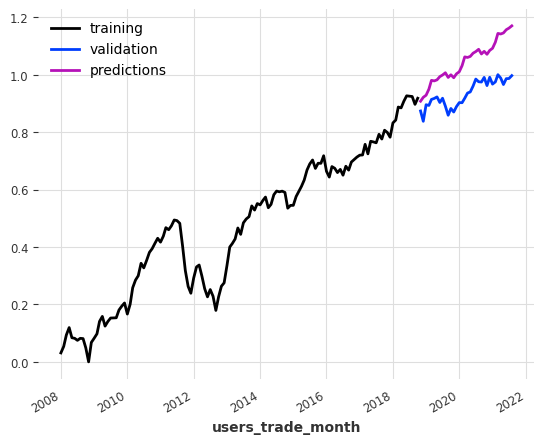

In [ ]:
train.plot(label="training")
val.plot(label="validation")
exp_forecast.plot(label = "predictions")

In [ ]:
import matplotlib.pyplot as plt

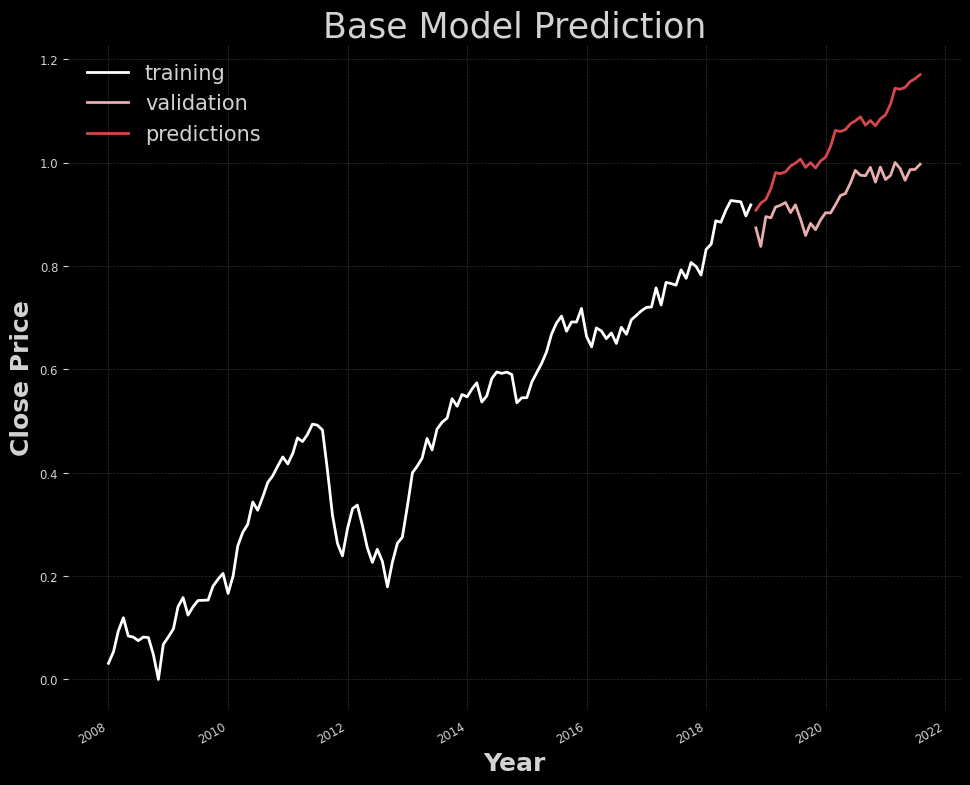

In [ ]:
import matplotlib.pyplot as plt
# Increase the figure size by 20%
figsize = (6.4 * 1.8, 4.8 * 1.8)
# Plotting
fig, ax = plt.subplots(figsize=figsize)
# Set background color and text color
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='lightgrey')
ax.tick_params(axis='y', colors='lightgrey')
ax.spines['bottom'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')
ax.yaxis.label.set_color('lightgrey')
ax.xaxis.label.set_color('lightgrey')
ax.title.set_color('lightgrey')
ax.grid(color='#313131', linestyle='--', linewidth=0.5)
# Plot the series with specified colors
train.plot(ax=ax, label="training", color='white')
val.plot(ax=ax, label="validation", color='#E8ADAD')
exp_forecast.plot(ax=ax, label="predictions", color='#D6474C') ##### CHANGE THE MODEL NAME HERE
# Set title
ax.set_title('Base Model Prediction', color='lightgrey', fontsize=25)
# Set x-axis label
ax.set_xlabel('Year', color='lightgrey', fontsize=18)
# Set y-axis label
ax.set_ylabel('Close Price', color='lightgrey', fontsize=18)
# Legend
legend = ax.legend(fontsize=15)
for text in legend.get_texts():
    text.set_color('lightgrey')
plt.savefig('base_model_plot.png')
# Show plot
plt.show()

In [ ]:
from darts.metrics import mape

accuracy = mape(val, exp_forecast)
print(f"Mean Absolute Percentage Error: {accuracy}")

Mean Absolute Percentage Error: 11.788603412429286


In [ ]:
from darts.models import AutoARIMA, Prophet, TBATS

results_dict = {}

for model in [AutoARIMA, Prophet, TBATS]:
    temp = model()
    temp.fit(train)
    preds = temp.predict(len(val))
    accuracy = mape(val, preds)
    results_dict[f"{model}"] = accuracy

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk6psa3zr/qfd8vrs7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk6psa3zr/vaqzcmnc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35953', 'data', 'file=/tmp/tmpk6psa3zr/qfd8vrs7.json', 'init=/tmp/tmpk6psa3zr/vaqzcmnc.json', 'output', 'file=/tmp/tmpk6psa3zr/prophet_modelqiro_j2d/prophet_model-20240725194602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:46:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:46:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
results_dict

{"<class 'darts.models.forecasting.auto_arima.AutoARIMA'>": 11.414708109786012,
 "<class 'darts.models.forecasting.prophet_model.Prophet'>": 6.310770386137816,
 "<class 'darts.models.forecasting.tbats_model.TBATS'>": 11.345100181749771}

In [ ]:
trade_volume = df.Trade_volume

In [ ]:
trade_ts = TimeSeries.from_dataframe(df, time_col='users_trade_month', value_cols='Trade_volume')

<Axes: xlabel='users_trade_month'>

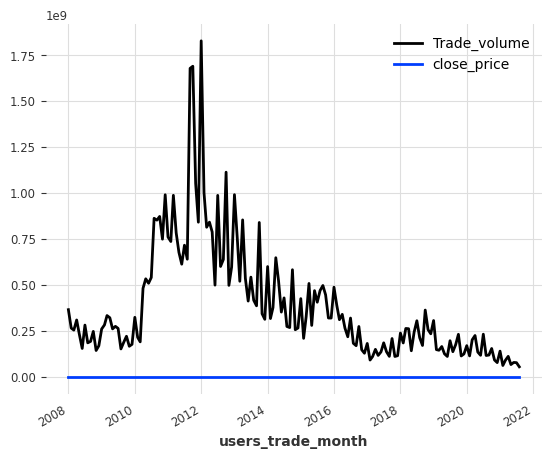

In [ ]:
trade_ts.plot()
scaled_ts.plot()

In [ ]:
preproc_weather_1 = ts_transformer.fit_transform(trade_ts)

<Axes: xlabel='users_trade_month'>

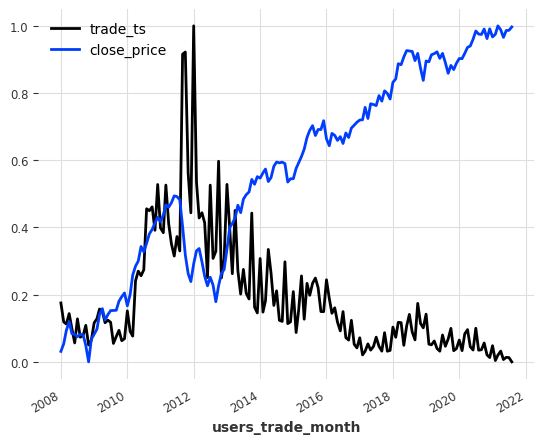

In [ ]:
preproc_weather_1.plot(label = "trade_ts")
scaled_ts.plot(label = "close_price")

In [ ]:
model_1 = Prophet()

In [ ]:
model_1.fit(train)
base_preds = model_1.predict(len(val))
accuracy = mape(val, base_preds)
covariates_dict = {}
covariates_dict["no_covariates"] = accuracy

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk6psa3zr/2o6dmj1o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk6psa3zr/klv156ao.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36326', 'data', 'file=/tmp/tmpk6psa3zr/2o6dmj1o.json', 'init=/tmp/tmpk6psa3zr/klv156ao.json', 'output', 'file=/tmp/tmpk6psa3zr/prophet_model_o308tap/prophet_model-20240725194631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:46:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:46:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
covariate_model_1 = Prophet()
# w future covariates only
covariate_model_1.fit(train, future_covariates = preproc_weather_1)
base_preds = covariate_model_1.predict(len(val), future_covariates=preproc_weather_1)
accuracy = mape(val, base_preds)
covariates_dict[f"future_covariates"] = accuracy

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk6psa3zr/00nnayfn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk6psa3zr/rn2pnfu1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89826', 'data', 'file=/tmp/tmpk6psa3zr/00nnayfn.json', 'init=/tmp/tmpk6psa3zr/rn2pnfu1.json', 'output', 'file=/tmp/tmpk6psa3zr/prophet_model6myue0kv/prophet_model-20240725194631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:46:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:46:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
covariates_dict

{'no_covariates': 6.310770386137816, 'future_covariates': 6.256075839948203}

In [ ]:
users_ts = TimeSeries.from_dataframe(df, time_col='users_trade_month', value_cols='total_users')

<Axes: xlabel='users_trade_month'>

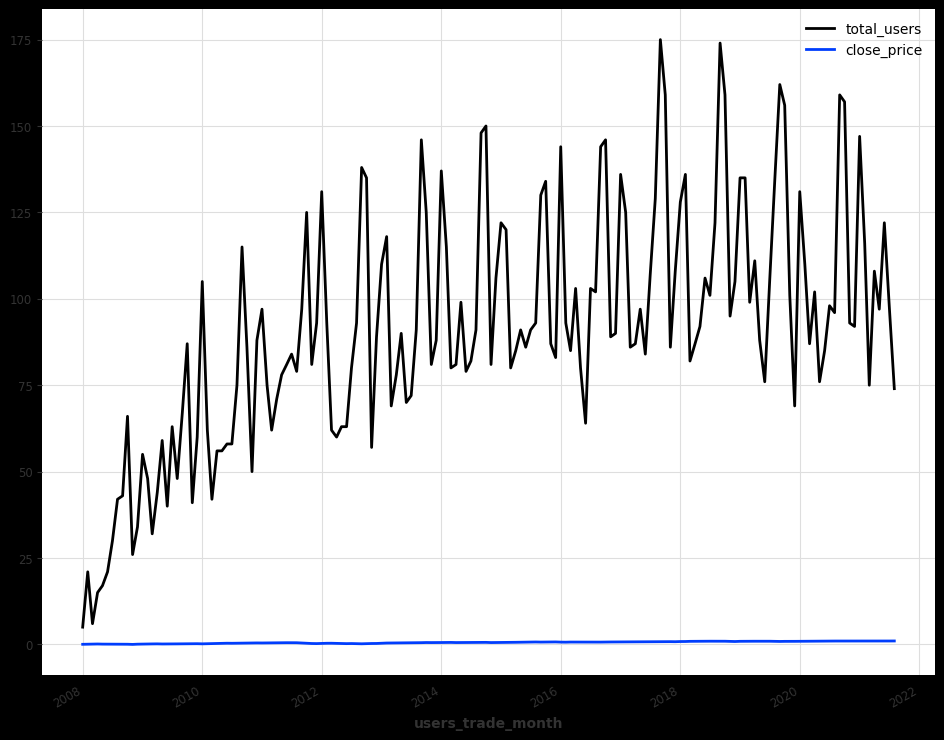

In [ ]:
figsize = (6.4 * 1.8, 4.8 * 1.8)
fig, ax = plt.subplots(figsize=figsize)
fig.patch.set_facecolor('black')
users_ts.plot()
scaled_ts.plot()

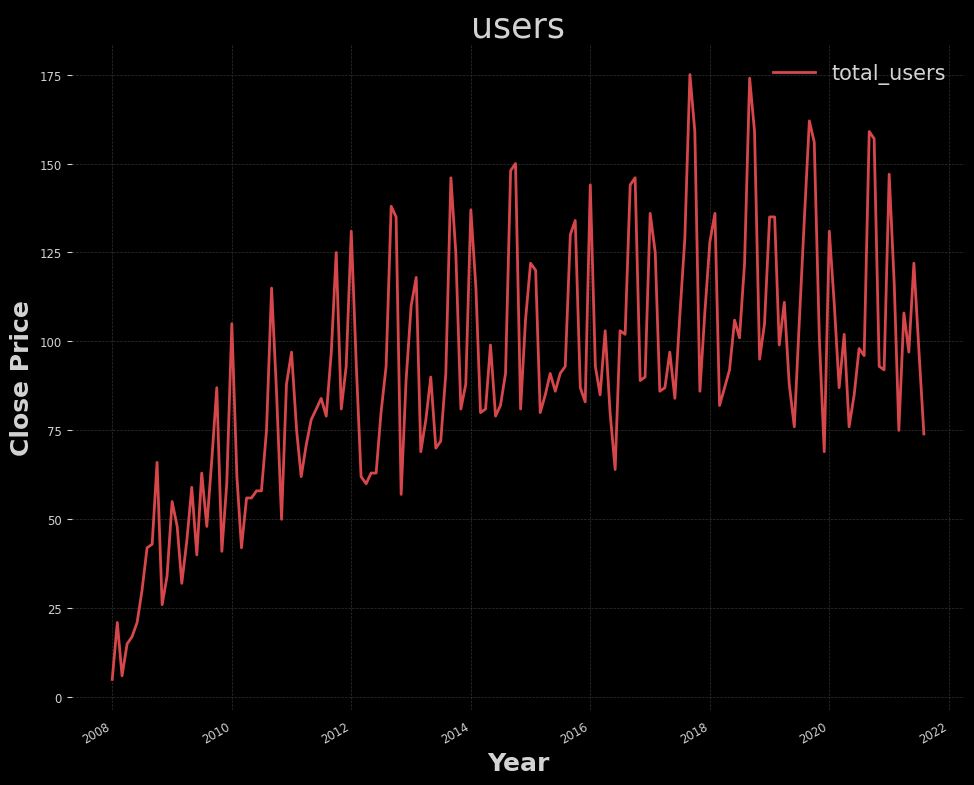

In [ ]:
import matplotlib.pyplot as plt
# Increase the figure size by 20%
figsize = (6.4 * 1.8, 4.8 * 1.8)
# Plotting
fig, ax = plt.subplots(figsize=figsize)
# Set background color and text color
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='lightgrey')
ax.tick_params(axis='y', colors='lightgrey')
ax.spines['bottom'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')
ax.yaxis.label.set_color('lightgrey')
ax.xaxis.label.set_color('lightgrey')
ax.title.set_color('lightgrey')
ax.grid(color='#313131', linestyle='--', linewidth=0.5)
# Plot the series with specified colors
users_ts.plot(ax=ax, label="total_users", color='#D6474C') ##### CHANGE THE MODEL NAME HERE
# Set title
ax.set_title('users', color='lightgrey', fontsize=25)
# Set x-axis label
ax.set_xlabel('Year', color='lightgrey', fontsize=18)
# Set y-axis label
ax.set_ylabel('Close Price', color='lightgrey', fontsize=18)
# Legend
legend = ax.legend(fontsize=15)
for text in legend.get_texts():
    text.set_color('lightgrey')
plt.savefig('users_plot.png')
# Show plot
plt.show()

In [ ]:
preproc_weather_2 = ts_transformer.fit_transform(users_ts)

<Axes: xlabel='users_trade_month'>

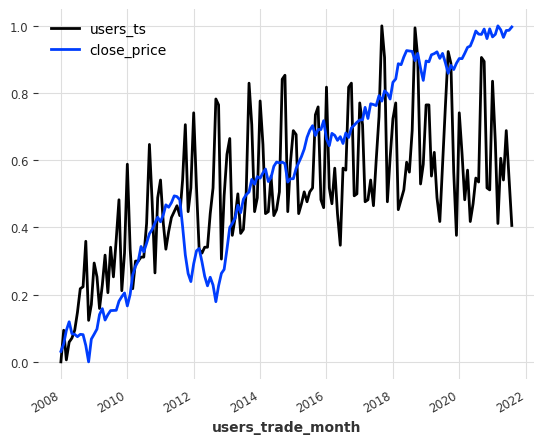

In [ ]:
preproc_weather_2.plot(label = "users_ts")
scaled_ts.plot(label = "close_price")

In [ ]:
model_2 = Prophet()

In [ ]:
model_2.fit(train)
base_preds = model_2.predict(len(val))
accuracy = mape(val, base_preds)
covariates_dict = {}
covariates_dict["no_covariates"] = accuracy

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk6psa3zr/pzd0dh_4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk6psa3zr/f5w39cwf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33077', 'data', 'file=/tmp/tmpk6psa3zr/pzd0dh_4.json', 'init=/tmp/tmpk6psa3zr/f5w39cwf.json', 'output', 'file=/tmp/tmpk6psa3zr/prophet_modelc3sw421a/prophet_model-20240725194636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:46:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:46:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
covariate_model_2 = Prophet()
# w future covariates only
covariate_model_2.fit(train, future_covariates = preproc_weather_2)
base_preds_2 = covariate_model_2.predict(len(val), future_covariates=preproc_weather_2)
accuracy = mape(val, base_preds_2)
covariates_dict[f"future_covariates"] = accuracy

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk6psa3zr/wqrgk8hj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk6psa3zr/uweodxrk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71944', 'data', 'file=/tmp/tmpk6psa3zr/wqrgk8hj.json', 'init=/tmp/tmpk6psa3zr/uweodxrk.json', 'output', 'file=/tmp/tmpk6psa3zr/prophet_modelinjuctqt/prophet_model-20240725194637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:46:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:46:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
covariates_dict

{'no_covariates': 6.310770386137816, 'future_covariates': 6.153132021981739}

<Axes: xlabel='users_trade_month'>

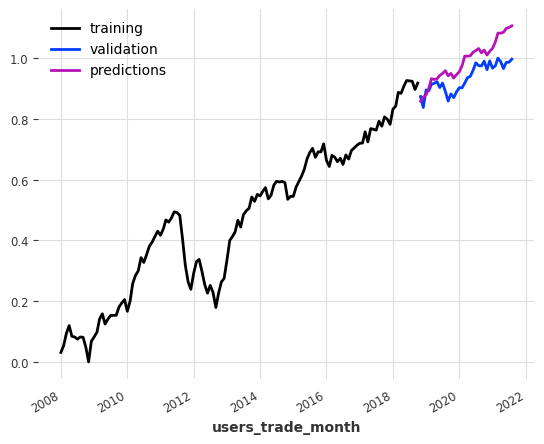

In [ ]:
train.plot(label="training")
val.plot(label="validation")
base_preds_2.plot(label = "predictions")

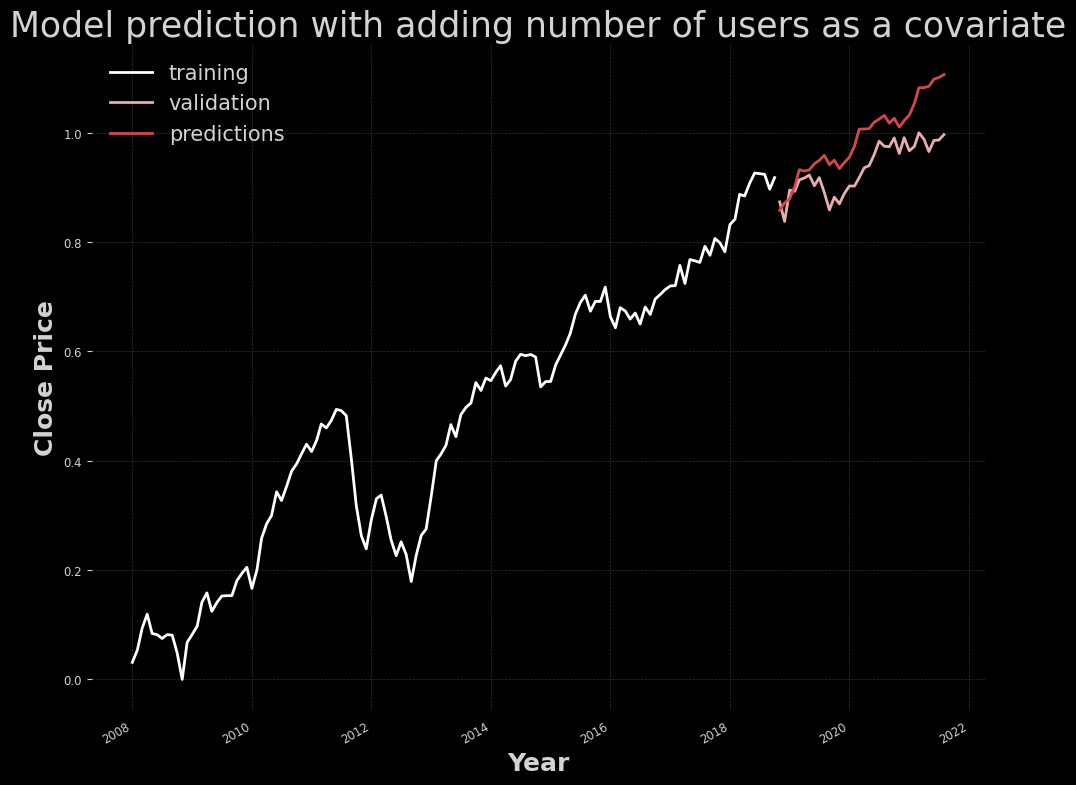

In [ ]:
import matplotlib.pyplot as plt
# Increase the figure size by 20%
figsize = (6.4 * 1.8, 4.8 * 1.8)
# Plotting
fig, ax = plt.subplots(figsize=figsize)
# Set background color and text color
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='lightgrey')
ax.tick_params(axis='y', colors='lightgrey')
ax.spines['bottom'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')
ax.yaxis.label.set_color('lightgrey')
ax.xaxis.label.set_color('lightgrey')
ax.title.set_color('lightgrey')
ax.grid(color='#313131', linestyle='--', linewidth=0.5)
# Plot the series with specified colors
train.plot(ax=ax, label="training", color='white')
val.plot(ax=ax, label="validation", color='#E8ADAD')
base_preds_2.plot(ax=ax, label="predictions", color='#D6474C') ##### CHANGE THE MODEL NAME HERE
# Set title
ax.set_title('Model prediction with adding number of users as a covariate', color='lightgrey', fontsize=25)
# Set x-axis label
ax.set_xlabel('Year', color='lightgrey', fontsize=18)
# Set y-axis label
ax.set_ylabel('Close Price', color='lightgrey', fontsize=18)
# Legend
legend = ax.legend(fontsize=15)
for text in legend.get_texts():
    text.set_color('lightgrey')
plt.savefig('co-variate_plot.png')
# Show plot
plt.show()